<a href="https://colab.research.google.com/github/chethana613/artificial-intelligence/blob/main/8_Queens_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please enter the population size: 1000
Max Fitness value for 1 generation: 26
Max Fitness value for 2 generation: 26
Max Fitness value for 3 generation: 27
Max Fitness value for 4 generation: 27
Max Fitness value for 5 generation: 26
Max Fitness value for 6 generation: 27
Max Fitness value for 7 generation: 26
Max Fitness value for 8 generation: 26
Max Fitness value for 9 generation: 26
Max Fitness value for 10 generation: 27
Max Fitness value for 11 generation: 26
Max Fitness value for 12 generation: 26
Max Fitness value for 13 generation: 26
Max Fitness value for 14 generation: 26
Max Fitness value for 15 generation: 26
Max Fitness value for 16 generation: 26
Max Fitness value for 17 generation: 26
Max Fitness value for 18 generation: 26
Max Fitness value for 19 generation: 26
Max Fitness value for 20 generation: 26
Max Fitness value for 21 generation: 26
Max Fitness value for 22 generation: 26
Max Fitness value for 23 generation: 27
Max Fitness value for 24 generation: 26
Max Fitnes

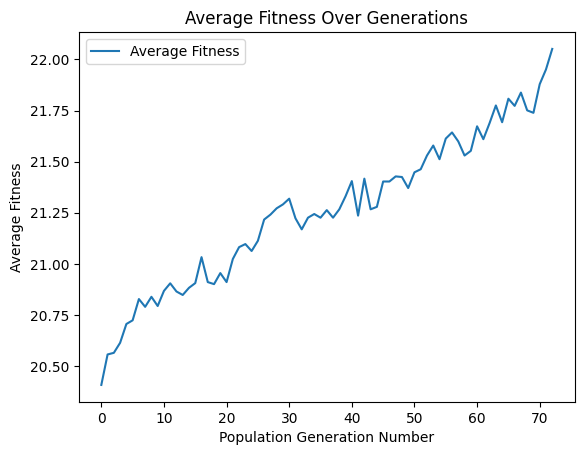

In [14]:
import random
import matplotlib.pyplot as plt

#Generating a random chromosome representing the placement of queens on the chessboard.
def generate_population_chromosome(no_of_queens):
    return [random.randint(1, no_of_queens) for _ in range(no_of_queens)]

#Calculating the fitness score of a chromosome.
def fitness(chromosome):
    size = len(chromosome)
    horizontal_collisions = sum([chromosome.count(queen) - 1 for queen in chromosome]) // 2
    diagonal_collisions = 0
    for x in range(size):
        for y in range(x + 1, size):
            if abs(x - y) == abs(chromosome[x] - chromosome[y]):
                diagonal_collisions += 1
    return max_fitness - (horizontal_collisions + diagonal_collisions)

#Selecting a parent from the population based on their probabilities.
def select_random_parent(population, probabilities):
    total_probability = sum(probabilities)
    r_num = random.uniform(0, total_probability)
    cumulative_probability = 0
    for chromosome, probability in zip(population, probabilities):
        cumulative_probability += probability
        if cumulative_probability >= r_num:
            return chromosome
    assert False, "Should not reach here"

#Performing crossover between two parent chromosomes.
def crossover(p1, p2):
    size_of_parent = len(p1)
    crossover_point = random.randint(0, size_of_parent - 1)
    return p1[:crossover_point] + p2[crossover_point:]

#Calculating the probability of a chromosome based on its fitness.
def calculate_probability(chromosome, fitness):
    return fitness(chromosome) / max_fitness

def print_chess_board(chess_board):
    for row in chess_board:
        print(" ".join(row))

#Performing mutation on a child chromosome.
def mutation(child_chromosome):
    size = len(child_chromosome)
    mutation_point = random.randint(0, size - 1)
    mut = random.randint(1, size)
    child_chromosome[mutation_point] = mut
    return child_chromosome

#Generating the next generation of chromosomes using Genetic Algorithm.
def generate_ga_queen(population, fitness, mutation_probability):
    child_population = []
    probabilities = [calculate_probability(c, fitness) for c in population]
    for i in range(len(population)):
        parent1 = select_random_parent(population, probabilities)
        parent2 = select_random_parent(population, probabilities)
        child = crossover(parent1, parent2)

        if random.random() < mutation_probability:
            child = mutation(child)
        child_population.append(child)
        if fitness(child) == max_fitness:
            break
    return child_population

def genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability):
    average_fitness = []
    resultant_chromosome = []  # Initialize resultant_chromosome
    population = [generate_population_chromosome(no_of_queens) for _ in range(population_size)]
    for generation in range(max_generations):
        if max_fitness in [fitness(chromosome) for chromosome in population]:
            print(f"Solution found after {generation + 1} generations")
            break
        population = generate_ga_queen(population, fitness, mutation_probability)
        print(f"Max Fitness value for {generation + 1} generation: {max([fitness(chromosome) for chromosome in population])}")
        avg = sum([fitness(chromosome) for chromosome in population]) / len(population)
        average_fitness.append(avg)
    else:
        print("No solution found")
        resultant_chromosome = []  # Set resultant_chromosome to an empty list if no solution is found

    print(f"Total iterations: {generation + 1}")
    print(f"Population size: {population_size}")
    print(f"Total number of Generations: {generation + 1}")

    for chromosome in population:
        if fitness(chromosome) == max_fitness:
            resultant_chromosome = chromosome
            print(f"Solution found: Chromosome = {chromosome} and Fitness = {fitness(chromosome)}")
            break

    chess_board = [["*"] * no_of_queens for _ in range(no_of_queens)]
    for pos in range(no_of_queens):
        if resultant_chromosome:  # Check if resultant_chromosome is not empty
            chess_board[no_of_queens - resultant_chromosome[pos]][pos] = "Q"

    print("8-Queens puzzle board solution:")
    print_chess_board(chess_board)
    plot_graph(average_fitness)


def plot_graph(average_fitness):
    plt.plot(average_fitness)
    plt.xlabel("Population Generation Number")
    plt.ylabel("Average Fitness")
    plt.title("Average Fitness Over Generations")
    plt.legend(["Average Fitness"], loc='best')
    plt.show()

if __name__ == "__main__":
    no_of_queens = 8
    max_fitness = no_of_queens * (no_of_queens - 1) // 2
    population_size = int(input("Please enter the population size: "))
    max_generations = 1000
    mutation_probability = 0.05
    genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability)
